# Blue or Green Screen Effect with OpenCV [Chroma keying]

https://medium.com/fnplus/blue-or-green-screen-effect-with-open-cv-chroma-keying-94d4a6ab2743


In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim
import urllib

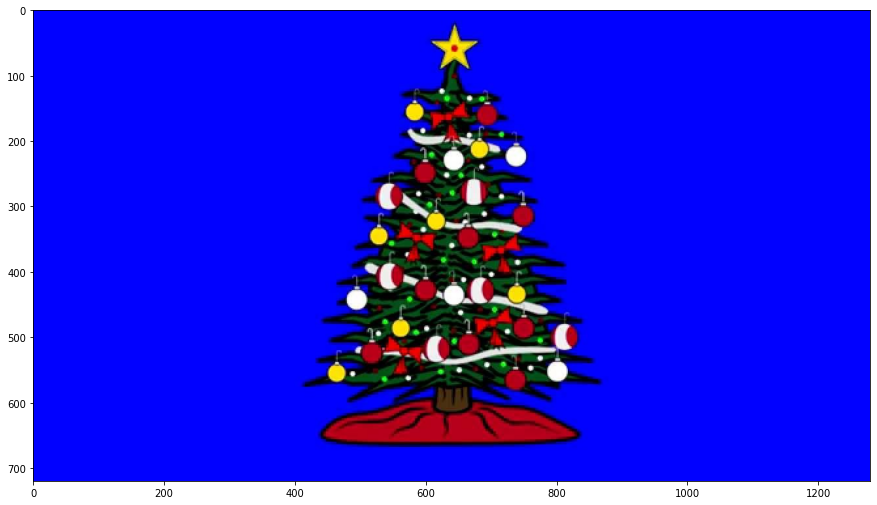

In [16]:
req = urllib.request.urlopen('https://raw.githubusercontent.com/tejakummarikuntla/blue-screen-effect-OpenCV/master/images/maxresdefault.jpg')
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img = cv.imdecode(arr, cv.IMREAD_COLOR ) # 'Load it as grayscale'

img_copy = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.figure(figsize=(15,15))
plt.imshow(img_copy)
plt.show()

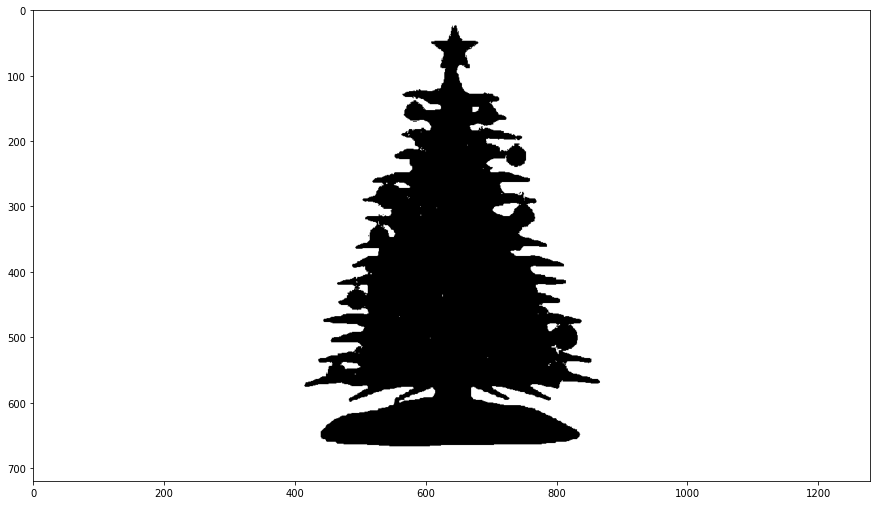

In [17]:
lower_blue = np.array([0, 0, 100])     ##[R value, G value, B value]
upper_blue = np.array([120, 100, 255]) 

mask = cv.inRange(img_copy, lower_blue, upper_blue)
plt.figure(figsize=(15,15))
plt.imshow(mask, cmap='gray')

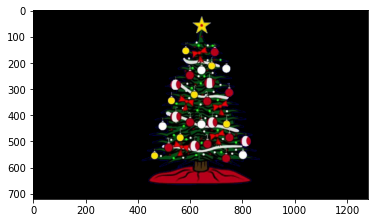

In [18]:
masked_image = np.copy(img_copy)
masked_image[mask != 0] = [0, 0, 0]
plt.imshow(masked_image)

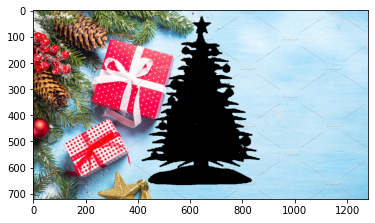

In [19]:
req = urllib.request.urlopen('https://raw.githubusercontent.com/tejakummarikuntla/blue-screen-effect-OpenCV/master/images/treeBackground.jpg')
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
background_image = cv.imdecode(arr, cv.IMREAD_COLOR ) # 'Load it as grayscale'
background_image = cv.cvtColor(background_image, cv.COLOR_BGR2RGB)

crop_background = background_image[0:720, 0:1280]

crop_background[mask == 0] = [0, 0, 0]

plt.imshow(crop_background)

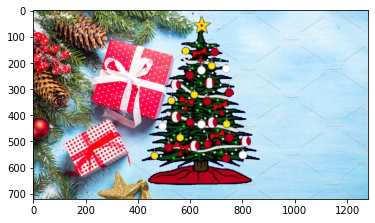

In [20]:
final_image = crop_background + masked_image
plt.imshow(final_image)